## Keyword

- 키워드
    - 텍스트에서 중요한 어휘
    - 키워드를 통해 텍스트가 무엇을 전달하려고 하는가를 알 수 있다 $\Rightarrow$ 텍스트의 대하여성(aboutness)
- 빈도가 높은 어휘는 모두 키워드?
    - 고빈도 어휘 $\Rightarrow$ 전달하고자 하는 의미와 관련 어휘는 반복(repetition)되는 사용 경향이 있다 $\Rightarrow$ 주제어 가능성 있음
    - 모든 고빈도 어휘는 키워드일까?
        - 그렇다고 볼 수는 없다.
        - the, of, his 등 문법어/기능어 $\Rightarrow$ aboutness와 상관없다? 맥락에 따라 중요할 수 있다.
        - time, like, new, first, know, people 등 고빈도 내용어 $\Rightarrow$ 텍스트 사이의 식별력이 없다?
- 산출 방식
    - 키워드 산출 공식: Chi-squared, log-likelihood, ... (주로 비교할 때)
    - 비교 대상 텍스트, 참조 코퍼스

## positive/negative keyword
- positive: 자주 쓰임
- negative: 덜 쓰임
- 텍스트를 모르고 분석을 시작했을 때 negative 키워드를 보면 문어적/구어적 특성을 알아낼 수 있다.

#### Scott, M., & Tribble, C. (2006). Textual patterns. Key words and corpus analysis in language.

- 세 가지 유형의 키워드
    - 고유명사
        - 등장인물
        - 이야기의 배경 등(도시 등)
    - 문법어(function word)
        - 텍스트의 스타일
        - 인물의 특성
    - 내용어
        - 텍스트가 무엇을 이야기 하고 있는가?(aboutness)
        - 대부분의 키워드 분석은 이 부분에 초점

## 연어와 키워드를 이용한 접근
연어는 빈도효과와 촉발효과의 산물이다.

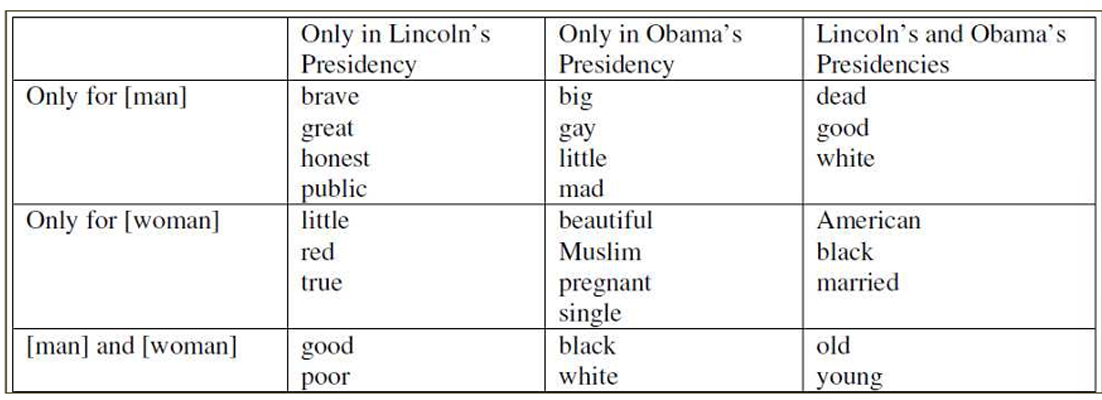
- 링컨 대통령 시대와 오바마 대통령 시대 텍스트의 man과 woman
- 두 시대 상의 남성상/여성상을 읽어낼 수 있다.
- 데이터 분석은 아이디어가 필요하다.

## 예제 데이터: 09_data.zip
- `09_data` 폴더에 압축 풀기
- Crowley.txt, Obama.txt, Question.txt, Romney.txt
- 2012년 미국 대선 Obama vs. Romney 방송 토론회 전사 자료 중 Obama, Romney, Crowley(사회자), Question(질문자) 발화 추출
- (음성특성), 문장부호 연쇄 등 포함

In [26]:
import os, re
from collections import Counter
import pandas as pd

TDM = {}
for i in sorted(os.listdir('./data/09_data')):
    if i.endswith('.txt'):
        words = re.sub(r'[(][\w\W]+?[)]', '', 
                        open('./data/09_data/' + i).read().lower()).split()
        words = [re.sub(r'^\W+|\W+$', '', w) for w in words]
        words = [w for w in words if len(w) > 0]
        TDM[i.replace('.txt', '')] = Counter(words)
df = pd.DataFrame(TDM).sort_index().fillna(0).astype('int')
df.index.name = 'Word'

In [27]:
df.head()

,Crowley,Obama,Question,Romney
Word,,,,
1,0,1,0,0
"1,000",0,1,0,0
"1,200",0,0,0,1
1.80,0,1,0,0
1.86,0,1,0,1


## Chi-squared 잔차 DataFrame
- Chi-squared 통계량
- p-value
- 자유도
- 기대빈도: `np.ndarray`
- Residual(잔차)이 클수록 기대빈도보다 관찰빈도가 높게, 작으면 기대빈도보다 관찰빈도가 작게 나왔다.
- 가급적 column을 많이 만드는 게 좋다. 0 값이 많아서

In [28]:
from scipy import stats
chi2, p, dof, ef = stats.chi2_contingency(df)

In [29]:
chi2

np.float64(11004.070100742028)

In [30]:
p

np.float64(1.5135003458828203e-251)

In [31]:
dof

6381

In [32]:
ef[:4, :]

array([[0.09879599, 0.42016428, 0.03195679, 0.44908293],
       [0.09879599, 0.42016428, 0.03195679, 0.44908293],
       [0.09879599, 0.42016428, 0.03195679, 0.44908293],
       [0.09879599, 0.42016428, 0.03195679, 0.44908293]])

In [33]:
import numpy as np
res = pd.DataFrame((df.values - ef) / np.sqrt(ef),
                    index=df.index,
                    columns=df.columns)
res.head()

,Crowley,Obama,Question,Romney
Word,,,,
1,-0.314318,0.894531,-0.178765,-0.670137
"1,000",-0.314318,0.894531,-0.178765,-0.670137
"1,200",-0.314318,-0.648201,-0.178765,0.822097
1.80,-0.314318,0.894531,-0.178765,-0.670137
1.86,-0.444513,0.174182,-0.252811,0.107452


In [34]:
res.sort_values(by='Obama', ascending=False).head()

,Crowley,Obama,Question,Romney
Word,,,,
we've,-2.222566,5.234413,-1.264057,-3.683412
that's,-3.025810,4.073171,-1.891867,-2.015958
are,-0.565199,3.563500,0.380604,-3.283286
got,-0.564272,3.416737,-1.158527,-2.731185
issue,-1.088831,3.098746,-0.619259,-2.321421


## Obama vs. Romney

In [35]:
res.sort_values(by='Obama', ascending=False).index[:30]

Index(['we've', 'that's', 'are', 'got', 'issue', 'sure', 'romney', 'young',
       'when', 'but', 'make', 'cuts', 'folks', 'i've', 'also', 'education',
       'everybody', 'we', 'governor', 'not', 'somebody', 'we're', 'who', 'she',
       'republican', 'philosophy', 'creating', 'romney's', 'comprehensive',
       'her'],
      dtype='object', name='Word')

In [36]:
res.sort_values(by='Romney', ascending=False).index[:30]

Index(['people', 'america', 'president's', 'by', 'have', 'four', 'down',
       'unemployment', 'federal', 'was', 'more', 'year', 'middle-income',
       'million', 'someone', 'settle', 'hire', 'legislation', 'budget', 'i'll',
       'illegally', 'find', 'get', 'attractive', 'north', 'instance', 'he'd',
       'bringing', 'food', 'percent'],
      dtype='object', name='Word')

- `contains` 부분 일치
- `==` 완전 일치

In [ ]:
res.loc[res.index.str.contains('^we$|^we\''),
        ['Obama', 'Romney']]

,Obama,Romney
Word,,
we,2.521935,-1.567396
we'd,0.620371,-0.163777
we'll,-1.587761,0.795314
we're,2.335211,-2.003567
we've,5.234413,-3.683412


In [39]:
res.loc[res.index.str.contains('^i$|^i\''),
        ['Obama', 'Romney']]

,Obama,Romney
Word,,
i,-2.544480,1.627222
i'd,0.617413,-0.080981
i'll,-1.909244,2.136370
i'm,-0.193993,-0.118141
i've,2.605760,-1.944320


- Obama는 이미 대통령을 했었기 때문에 과거형을 많이 썼다.
    - 무엇을 했다.
- 반면 Romney는 처음 도전했기 때문에 미래형을 많이 썼다.
    - 무엇을 하겠다.

- `we`: 청중
- `i`: 청중과 나를 분리